Shape of original image: (512, 512)


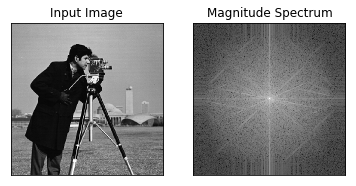

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data

# circle mask will require the next import:
from skimage.draw import circle

img = data.camera()

img_float32 = np.float32(img)
print('Shape of original image:',img_float32.shape)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
# Now once you got the result, zero frequency component 
# (DC component) will be at top left corner. 
# If you want to bring it to center, you need
# to shift the result by \frac{N}{2} in both the directions. 
# This is simply done by the function, np.fft.fftshift().
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

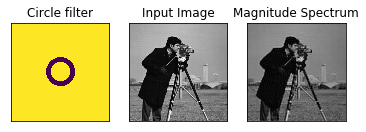

In [13]:
# TASK: change filtering range from square to circle
# TASK: this can also be regarded as a Bandpass filter (with both Low & High boundaries)
# 'outer_rim' shows high boundary, 'inner_rim' - low;
# bigger the difference - blurrier the image will get

# examples for DFT

# import numpy as np
# Return the Discrete Fourier Transform sample frequencies.
freqs = np.fft.fftfreq(10, 0.1)
# print(freqs)
freqs_shifted = np.fft.fftshift(freqs)
# print(freqs_shifted)
# print(cv2.magnitude(freqs_shifted,freqs_shifted))

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

# creating a square mask, center square is 1, remaining all zeros
mask_ = np.zeros((rows, cols, 2), np.uint8)
mask_[crow-flt_size:crow+flt_size, ccol-flt_size:ccol+flt_size,:] = 1

# creating a circle mask, circle= 1, remaining = 0
# boundaries:
outer_rim = 75
inner_rim = 50

rrows, rcols = circle(crow, ccol, outer_rim)
maskCircle = np.ones((rows, cols, 2), np.uint8)
maskCircle[rrows, rcols] = 0
rrows, rcols = circle(crow, ccol, inner_rim)
maskCircle[rrows, rcols] = 1

new_shift = dft_shift*maskCircle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131), plt.imshow(maskCircle[:,:,0])
plt.title('Circle filter'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

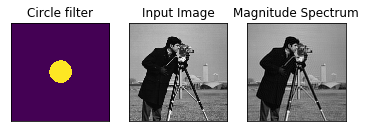

In [18]:
# TASK: applying the High Pass Filter for image of cameraman
# based on previous codes for Band Pass, i decided to cut off the 'lower' boundary
# hence, the 'outer_rim' variable is left
# 'outer_rim' affects image in following way:
# closer to zero - blurrier the image, farther - less filtering applied

# center:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)

# upper boundary:
outer_rim = 58

rrows, rcols = circle(crow, ccol, outer_rim)
maskCircle = np.zeros((rows, cols, 2), np.uint8)
maskCircle[rrows, rcols] = 1

new_shift = dft_shift*maskCircle
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(131), plt.imshow(maskCircle[:,:,0])
plt.title('Circle filter'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

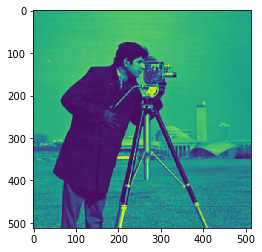

In [26]:
# TASK: wavelet code corrected

import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from sklearn.preprocessing import MinMaxScaler 
import pywt

img = data.camera()
imArray = np.float32(img)
imArray /= 255;

coeffs = pywt.wavedec2(imArray, 'haar')
coeffs_H = list(coeffs)  
coeffs_H[0] *= 0;  

imArray_H = pywt.waverec2(coeffs_H, 'haar')

plt.imshow(imArray_H,cmap='gray')
imArray = np.float32(img)
imArray /= 255;

coeffs=pywt.wavedec2(imArray, 'haar')
coeffs_H=list(coeffs)  
coeffs_H[0] *= 0;  

# reconstruction
imArray_H = pywt.waverec2(coeffs_H, 'haar')
plt.imshow(imArray_H)
plt.show()